<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/IA_Unidade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<br>
<br>

# Inteligência Artificial
---


# Redes Neurais

## Modelo de Neurônio Artificial

Sobre o trabalho de McCulloch-Pitts, o psicólogo Frank Rosenblatt concebeu em 1957 o Perceptron, um modelo matemático bastante simplificado de um neurônio biológico. Esse modelo é basicamente o mesmo empregado até hoje nos modelos neurais e mesmo redes neurais profundas.

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_perceptron.png" width=500, align="center">
<br>
<br>
<figcaption><b>Modelo Perceptron de Neurônio Artificial.</b></figcaption>
</figure>

## Aprendizado do Neurônio Artificial

No Perceptron, os pesos nas entradas do neurônio permitiram um esquema de aprendizagem bastante simples e intuitivo: dado um conjunto de treinamento de exemplos de entrada-saída (uma função), o Perceptron deveria aprender a função a partir do ajuste dos pesos das entradas. Para cada elemento do conjunto de treinamento, o Perceptron aumentaria os pesos se a saída do Perceptron para a entrada fosse muito baixa em comparação à saída desse elemento, e diminuiria os pesos se a saída fosse muito alta. Mais formalmente o algoritmo seria:

```
1.	Comece com um Perceptron com pesos arbitrários e um conjunto de treinamento
2.	Para cada entrada do conjunto de treinamento, calcule a saída do Perceptron
3.	Se a saída do Perceptron é diferente da saída conhecida, então: 
4.	Se a saída é maior, diminua os pesos
5.	Se a saída é menor, aumente os pesos 
6.	Vá para o próximo elemento e repita 2-4 até o Perceptron não cometer mais erros 

```

Essa é uma ideia bastante simples. mas bastante influente de como se dá o aprendizado e, até hoje, o aprendizado se dá basicamente desse modo, mesmo nas redes profundas mais complexas. 

# Aprendizado Supervisionado 

A forma mais clássica de uso de modelos neurais é para o Aprendizado Supervisionado. Um conjunto de *treinamento*, permite que rede aprenda o mapeamento entre as entradas e a saída.

<br>
<img src="http://meusite.mackenzie.br/rogerio/TIC2021S1$/T1/ML.png" width=500, align="center">
<br>
<h8 align="center">
Vasant Dhar. Data Science and Prediction (ACM 2013)</h8>
<br>

## Histórico 

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_history.png" width=900, align="center">
<br>
<br>
<figcaption><b>Timeline das Redes Neurais.</b></figcaption>
</figure>


## Neurônio Artificial: Perceptron
 
Um neurônio artificial nada mais é do que um artefato de software que faz uma combinação linear das entradas e aplica uma **função de ativação** como a função $sign$, $tanh$ ou $relu$ para produzir uma saída.

$$ f(X) = sign( w_0 + w_1 x_1 + ... + w_n x_n ) $$

O treinamento do neurônio é feito ajustando-se os pesos $w_n$ de acordo com o erro de predição obtido para se estimar a saída $f(X) \cong y$.

$$ \min_{W} \sum || f(X)- y || $$

Você pode, então, entender o aprendizado de um neurônio como um **problema de otimização**.


## Funções de Ativação
Quaisquer combinações de operadores lineares são também lineares. Desse modo, sem uma função de ativação, as redes neurais somente poderiam solucionar problemas linearmente separáveis e seriam, portanto, equivalentes a um modelo de regressão linear. As funções de ativação são uma escolha importante na arquitetura de uma rede neural, pois facilitam a modelagem de relações mais complexas e são, ao final, elas que permitem que uma rede neural seja um aproximador universal de funções.

$$ f(x) = \frac{1}{(1 + e^{-x})} \quad \textrm{, Logistic } $$ 

$$ f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\quad \textrm{, Tanh} $$ 

$$ f(x) = max(0,x) \quad \textrm{, ReLu} $$ 

$$ f(x) = log(1 + e^{x}) \quad \textrm{, Softplus} $$ 

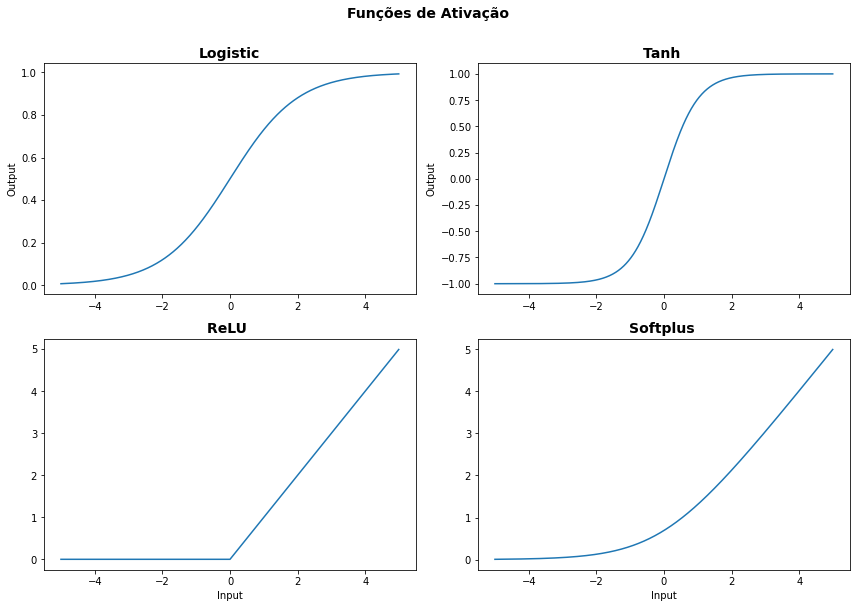

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.suptitle('Funções de Ativação', fontsize=14, weight='bold', y=1.05)

x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.subplot(2,2,1)
plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
# plt.xlabel('Input')
plt.ylabel('Output')

y = np.tanh(x)
plt.subplot(2,2,2)
plt.plot(x,y)
plt.title('Tanh ', fontsize=14, weight='bold')
# plt.xlabel('Input')
plt.ylabel('Output')

z = np.zeros(len(x))
y = np.maximum(z,x)
plt.subplot(2,2,3)
plt.plot(x,y)
plt.title('ReLU ', fontsize=14, weight='bold')
plt.xlabel('Input')
# plt.ylabel('Output');

y = np.log(1+np.exp(x))
plt.subplot(2,2,4)
plt.plot(x,y)
plt.title('Softplus ', fontsize=14, weight='bold')
plt.xlabel('Input')
# plt.ylabel('Output');

plt.tight_layout()
plt.show()



## Aprendizado do Perceptron **AND**, **OR**, **XOR**
 
Aqui empregamos o [Perceptron Learning Rule](https://en.wikipedia.org/wiki/Perceptron) para o aprendizado das funções `AND` e `OR`. O aprendizado falha para a função `XOR`, pois ela não é linearmente separável.

Perceptron Learning Rule:

$$ w_i(t+1) = w_i(t) + \eta (y_j - \tilde{y}_j(t) ) x_{j,i} \ $$

onde $\eta$ é a taxa de aprendizado, $i$ são índices das diferentes *features* (atributos) e *j* das diferentes instâncias de pares $(X,y)$. O procedimento é repedido por $n$ épocas (iterações) ao até o erro atingir um determinado threshold $\epsilon$.

$$\frac{1}{s} \sum_{j=1}^{s} |y_j - \tilde{y}_j(t)| \le \epsilon $$ 





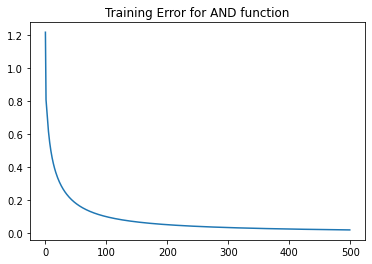

Error: 			 0.022
Epochs: 		 500
Predict: 		 [-0.99999406 -0.97467762 -0.97467762  0.96454078]
Predict Round: 		 [-1. -1. -1.  1.]
Pesos: 			 [ 4.18757856  4.18757854 -6.36682542]


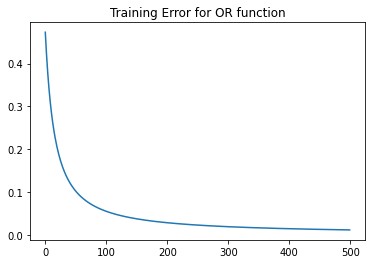

Error: 			 0.011
Epochs: 		 500
Predict: 		 [-0.97474607  0.98990911  0.98990589  0.99999934]
Predict Round: 		 [-1.  1.  1.  1.]
Pesos: 			 [ 4.82373046  4.8235707  -2.18062026]


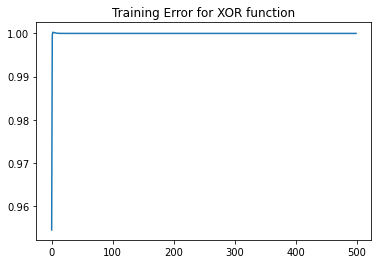

Error: 			 1.000
Epochs: 		 500
Predict: 		 [-5.55111512e-17  2.77555756e-17  2.77555756e-17  1.11022302e-16]
Predict Round: 		 [-0.  0.  0.  0.]
Pesos: 			 [ 8.32667268e-17  8.32667268e-17 -5.55111512e-17]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def train_perceptron(learn = 'AND', epochs = 500, learning_rate = 0.2, threshold = 1e-3):

  X = np.matrix([ [0,0], [1,0], [0,1], [1,1] ])
  learn_f = { 'AND':[-1, -1, -1, 1], 'OR':[-1, 1, 1, 1], 'XOR':[-1, 1, 1, -1] }
  y = np.array( learn_f[learn] )

  W = np.random.rand(3)

  y_pred = np.zeros([4])

  error_hist = []

  for epoch in range(epochs):
    for i in range(np.shape(X)[0]):
      y_pred[i] = np.tanh(W[0]*X[i,0] + W[1]*X[i,1] + W[2])

    error = 0
    for i in range(np.shape(y)[0]):
      error = error + np.abs(y[i] - y_pred[i])
    error = error / np.shape(y)[0]  #  erro médio

    error_hist.append(error)
    if error <= threshold: break 

    for i in range(np.shape(X)[0]):
      W[0] = W[0] + learning_rate * (y[i] - y_pred[i]) * X[i,0]
      W[1] = W[1] + learning_rate * (y[i] - y_pred[i]) * X[i,1]
      W[2] = W[2] + learning_rate * (y[i] - y_pred[i]) 

  return W, error_hist, y_pred


for funcao in ['AND','OR','XOR']:
  
  W, error_hist, y_pred = train_perceptron(funcao)
  # W, error_hist, y_pred = train_perceptron(funcao, 20000)

  sns.lineplot(x=range(len(error_hist)),y=error_hist)
  plt.title('Training Error for ' + funcao + ' function' )
  plt.show()

  print(f'Error: \t\t\t {error_hist[len(error_hist)-1] :0.3f}')
  print(f'Epochs: \t\t {len(error_hist)}')
  print(f'Predict: \t\t {y_pred}')
  print(f'Predict Round: \t\t {np.round(y_pred)}')
  print(f'Pesos: \t\t\t {W}')



## `scikit-learn` Perceptron

Acima desenvolvemos o aprendizado do Perceptron *by scratch* (do zero). Mas talvez interesse a você empregar a classe Perceptron do pacote `scikit-Learn`. O resultado será o mesmo do modelo acima.

A classe `Perceptron` encontra-se no `scikit-learn` dentro dos Classificadores lineares (SVM, regressão logística, etc.) que são treinados por métodos de gradiente descendente que você verá a seguir.

O uso da classe `Perceptron` segue de perto o esquema de muitos outros classificadores (como SVM, regressão logística e árvores de decisão). 
Podemos sumarizar esses passos em:

1. Define Model `m`
3. Train Model `m.fit(X,y)`
4. Predict Model `m.predict(X_test)`
5. Check results `m.score(X,y)`

Onde `X` e `y` são as variáveis do conjunto de treinamento e `X_test` as entradas que desejamos fazer a predição. Confortável com esse modelo? Esse esquema será bastante empregado na construção dos nossos modelos.




In [ ]:
from sklearn.linear_model import Perceptron

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]

for f, y in { 'AND':[0, 0, 0, 1], 'OR':[0, 1, 1, 1], 'XOR':[0, 1, 1, 0] }.items():
  
  print('\n Função: ', f); print(80*'-')

  ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1234)
  print(ppn)
  ppn.fit(X, y)    
 
  y_pred = ppn.predict([[0, 0], [0, 1], [1, 0], [1, 1]])
  print(y_pred)
 
  print(ppn.score(X,y))




 Função:  AND
--------------------------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1234, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
[0 0 0 1]
1.0

 Função:  OR
--------------------------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1234, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
[0 1 1 1]
1.0

 Função:  XOR
--------------------------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_

## Experimentando Redes Neurais *sem programação*



In [ ]:
from IPython.display import IFrame
IFrame('https://playground.tensorflow.org/', width='100%', height=600, style="-webkit-transform:scale(0.1);-moz-transform-scale(0.1);")

## Multilayer Perceptron, redes multicamada

Como você viu os perceptrons podem ser conectados, a saída de um sendo a entrada de outros elementos, de modo a formar da rede neural em camadas.

As camadas externas são as camadas de entrada e saída da rede. As camadas internas são as camadas de ocultas (hidden) da rede. As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas. 

>>> *As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas.* 

Essas redes são conhecidas também como feed-forward ou, mais modernamente, como modelos sequenciais. As entradas são processadas em sequência, uma camada após a outra. 

O problema é que o modelo de aprendizado do perceptron não pode mais ser aplicado diretamente a uma rede multicamada. 


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_multilayer.png" width=400, align="center">
<br>
<br>
<figcaption><b>Rede de Neurônicos Multicamada.</b></figcaption>
</figure>




## Backpropagation

Embora a ideia seja a mesma, o ajuste dos pesos para treinamento de uma rede multicamada difere bastante do ajuste dos pesos de um único perceptron e você deve notar que o ajuste terá magnitudes diferentes em cada camada. 

Aqui será útil empregarmos uma simplificação. Vamos supor uma rede de duas camadas definida pelas funções: 

$$ x \rightarrow  w_1 x = z \rightarrow  w_2  z^2  = y $$

Essas não são a função do perceptron, mas servem para ilustrar o procedimento. 

A primeira camada calcula  $w_1 x = z$ , e esse valor é a entrada para um novo cálculo e fornece a saída final  $w_2 z^2  = y$. É claro que ao final $y = w_2 ( w_1 x )^2$,  ou ainda $y = w_2 w_1^2 x^2$ , mas o processamento da rede é em camadas e a operação em cada uma delas, feita separadamente. Isso é importante para o ajuste dos pesos. Essas camadas e o ajustes *retropagados* encontram-se representados abaixo.


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_backpropagation.png" width=500, align="center">
<br>
<br>
<figcaption><b>Esquema do aprendizado da rede: retropropagação do erro.</b></figcaption>
</figure>


# Métodos de Busca



# State Space Search

<br>
<br>
<img src="http://meusite.mackenzie.br/rogerio/StateSpaceSearch.gif" width=500, align="center">
<br>
<br>



É uma tupla ($S$, $A$, $Action(s)$, $Result(s,a)$, $Custo(s,a)$):

1. $S$ é o conjunto de todos os estados possíveis;
2. $A$ é o conjunto de ações possíveis, não relacionadas a um estado particular, mas em relação a todo o espaço de estados;
3. $Action(s)$ é a função que estabelece qual ação é possível realizar em um determinado estado;
4. $Result(s, a)$ é a função que retorna o estado alcançado realizando a ação a no estado s
5. $Custo(s, a)$ é o custo de realização de uma ação

# Algoritmos de Busca

* Uninformed search algorithms: 

  * Breadth First Search
  * Depth First Search
  * Depth Limited Search
  * Iterative Deepening Search

* Informed search algorithms

  * Best First Search
  * Uniform Cost Search
  * A* Search
  * Recursive Best First Search

![imagem](http://meusite.mackenzie.br/rogerio/algoritmobusca.png)

## Representação em um grafo

Grafo uniforme.

![imagem](http://meusite.mackenzie.br/rogerio/graph.png)

In [48]:
graph = {'A': ['B', 'C', 'E'],
         'B': ['A', 'D', 'E'],
         'C': ['A', 'F', 'G'],
         'D': ['B'],
         'E': ['A', 'B', 'D'],
         'F': ['C'],
         'G': ['C']}

(NOTA: Árvores são mais simples para busca que grafos. Primeiramente porque quando um novo nodo é gerado, podemos estar seguros que ele nunca foi visitado antes nem nunca será gerado depois.)

## Pesquisa em Largura e em Profundidade

* **BFS** pesquisamos todos os nós da árvore lançando uma rede ampla, ou seja, percorremos um nível inteiro de nós filhos primeiro, antes de passarmos para atravessar os nós netos. E atravessamos todo um nível de nós de netos antes de passarmos por nós de bisnetos. O BFS explora os nós mais próximos primeiro e depois se afasta da origem.

* **DFS** sempre exploramos o nó mais profundo; ou seja, seguimos um caminho o mais fundo possível e, se chegarmos ao beco sem saída, voltamos e tentamos um caminho diferente até chegarmos ao fim.


> O DFS requer menos memória do que o BFS

> Mas o DFS não encontra necessariamente o caminho mais curto para um nó, enquanto o BFS o faz

![imagem](http://meusite.mackenzie.br/rogerio/bfs_versus_dfs.jpeg)


## Percorrendo todos os nós bfs

In [49]:
def bfs(graph, node):
  
    visited = []
    queue = []
    visited.append(node)
    queue.append(node)
    
    while queue:
        node = queue.pop(0) 
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                
                print
                queue.append(neighbor)
    
    return visited


bfs(graph, 'A')

['A', 'B', 'C', 'E', 'D', 'F', 'G']

In [50]:
def bfs(graph, node):
  
    visited = []
    queue = []
    visited.append(node)
    queue.append(node)
    
    while queue:
        print(' queue  : ', queue)
        node = queue.pop(0) 

        print('\n node   : ', node)
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)

                print(' visited: ', visited)
                queue.append(neighbor)
    
    return visited


bfs(graph, 'A')

 queue  :  ['A']

 node   :  A
 visited:  ['A', 'B']
 visited:  ['A', 'B', 'C']
 visited:  ['A', 'B', 'C', 'E']
 queue  :  ['B', 'C', 'E']

 node   :  B
 visited:  ['A', 'B', 'C', 'E', 'D']
 queue  :  ['C', 'E', 'D']

 node   :  C
 visited:  ['A', 'B', 'C', 'E', 'D', 'F']
 visited:  ['A', 'B', 'C', 'E', 'D', 'F', 'G']
 queue  :  ['E', 'D', 'F', 'G']

 node   :  E
 queue  :  ['D', 'F', 'G']

 node   :  D
 queue  :  ['F', 'G']

 node   :  F
 queue  :  ['G']

 node   :  G


['A', 'B', 'C', 'E', 'D', 'F', 'G']

## Percorrendo todos os nós dfs

(recursivo)

In [51]:
def dfs(visited, graph, node):

    
    if node not in visited:
        print('\n node   : ', node)

        visited.add(node)

        print(' visited: ', visited)
        for neighbor in graph[node]:
            dfs(visited, graph, neighbor)

    return list(visited)

visited = set()
dfs(visited, graph, 'A')


 node   :  A
 visited:  {'A'}

 node   :  B
 visited:  {'A', 'B'}

 node   :  D
 visited:  {'A', 'D', 'B'}

 node   :  E
 visited:  {'A', 'D', 'B', 'E'}

 node   :  C
 visited:  {'A', 'D', 'B', 'C', 'E'}

 node   :  F
 visited:  {'A', 'D', 'F', 'B', 'C', 'E'}

 node   :  G
 visited:  {'A', 'D', 'F', 'G', 'B', 'C', 'E'}


['A', 'D', 'F', 'G', 'B', 'C', 'E']

## Encontrando um Menor Caminho

Adicionando um objetivo

In [66]:
# Menor caminho entre dois nós empregando bfs
def bfs_shortest_path(graph, start, goal):

    visited = []
    queue = [[start]]

    if start == goal:
        return "Start = Goal, no problem!"
 
    while queue:

        path = queue.pop(0)
        node = path[-1] # último nó do caminho
        
        if node not in visited:

            neighbours = graph[node]

            for neighbour in neighbours:

                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

                if neighbour == goal: # encontrou
                    return new_path
 
            visited.append(node)
 
    return "Não existe caminho :("
 
bfs_shortest_path(graph, 'A', 'F') 

['A', 'C', 'F']

In [65]:
# Menor caminho entre dois nós empregando bfs
def bfs_shortest_path(graph, start, goal):

    visited = []
    queue = [[start]]

    if start == goal:
        return "Start = Goal, no problem!"
 
    while queue:

        path = queue.pop(0)
        node = path[-1] # último nó do caminho
        
        if node not in visited:
            print('\n node   : ', node)

            neighbours = graph[node]

            for neighbour in neighbours:

                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

                print(' queue  : ', queue)

                if neighbour == goal: # encontrou
                    return new_path
 
            visited.append(node)
            print(' visited: ', visited)
 
    return "Não existe caminho :("
 
bfs_shortest_path(graph, 'A', 'F') 


 node   :  A
 queue  :  [['A', 'B']]
 queue  :  [['A', 'B'], ['A', 'C']]
 queue  :  [['A', 'B'], ['A', 'C'], ['A', 'E']]
 visited:  ['A']

 node   :  B
 queue  :  [['A', 'C'], ['A', 'E'], ['A', 'B', 'A']]
 queue  :  [['A', 'C'], ['A', 'E'], ['A', 'B', 'A'], ['A', 'B', 'D']]
 queue  :  [['A', 'C'], ['A', 'E'], ['A', 'B', 'A'], ['A', 'B', 'D'], ['A', 'B', 'E']]
 visited:  ['A', 'B']

 node   :  C
 queue  :  [['A', 'E'], ['A', 'B', 'A'], ['A', 'B', 'D'], ['A', 'B', 'E'], ['A', 'C', 'A']]
 queue  :  [['A', 'E'], ['A', 'B', 'A'], ['A', 'B', 'D'], ['A', 'B', 'E'], ['A', 'C', 'A'], ['A', 'C', 'F']]


['A', 'C', 'F']